In [34]:
#importing relevant libraries
'''
1) sklearn tools

accuracy_score
how accurate model is

precision_score
tp/tp+fp

recall_score
tp/tp+fn

test_train_split
How to divide given dataset between training set and test set by percentage

2) keras

layers
layers to add to the nn

losses
loss function to consider

datasets
MNIST,CIFAR10,etc.

Models
Sequentail model of network usually used can sequentially add layers to build 

'''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd3
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
#evaluation

from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,train_size=None,random_state=42)
#random_state randomizer value

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
#building the nn


In [35]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [36]:
latent_dim = 32 

class autoencoder(Model):
  def __init__(self, latent_dim):
    super(autoencoder, self).__init__()
    self.latent_dim = latent_dim  
    
    self.encoder = tf.keras.Sequential([
        
      layers.Flatten(),
    #Flatten compresses input dimension (60,2,2)--(60,4)
        
      layers.Dense(latent_dim, activation='relu'),
    #Dense layer calculates output = activation(dot(input, kernel) + bias)
    ])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

a = autoencoder(latent_dim)

In [37]:
a.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [38]:
a.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 2s 942us/step - loss: 0.0291 - val_loss: 0.0168
Epoch 2/10
1875/1875 [==============================] - 2s 934us/step - loss: 0.0151 - val_loss: 0.0141
Epoch 3/10
1875/1875 [==============================] - 2s 918us/step - loss: 0.0137 - val_loss: 0.0135
Epoch 4/10
1875/1875 [==============================] - 2s 968us/step - loss: 0.0133 - val_loss: 0.0132
Epoch 5/10
1875/1875 [==============================] - 2s 904us/step - loss: 0.0131 - val_loss: 0.0132
Epoch 6/10
1875/1875 [==============================] - 2s 885us/step - loss: 0.0130 - val_loss: 0.0130
Epoch 7/10
1875/1875 [==============================] - 2s 884us/step - loss: 0.0129 - val_loss: 0.0130
Epoch 8/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.0128 - val_loss: 0.0129
Epoch 9/10
1875/1875 [==============================] - 2s 921us/step - loss: 0.0128 - val_loss: 0.0130
Epoch 10/10
1875/1875 [==============================] - 2s 883u

In [40]:
encoded = a.encoder(x_test).numpy()
decoded = a.decoder(encoded).numpy()

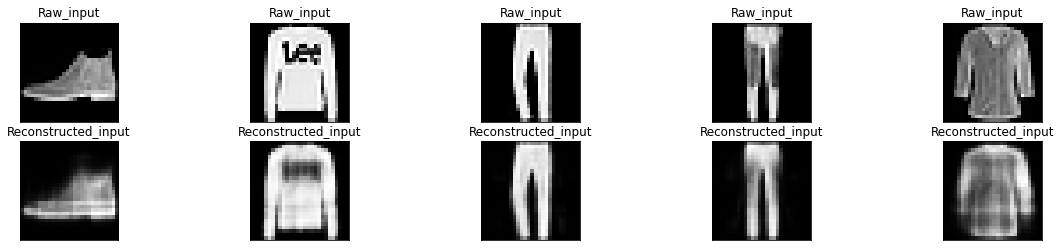

In [41]:
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("Raw_input")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded[i])
  plt.title("Reconstructed_input")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()